In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from math import sqrt

In [2]:
df = pd.read_csv("Datasets\FRED-NROUST.csv")

In [3]:
df

,Date,Value
0,01-01-1949,5.255053
1,01-04-1949,5.261516
2,01-07-1949,5.268013
3,01-10-1949,5.274564
4,01-01-1950,5.281182
...,...,...
327,01-10-2030,4.294982
328,01-01-2031,4.289282
329,01-04-2031,4.283630
330,01-07-2031,4.278029


In [4]:
y = df["Value"]

y_train = df["Value"][:-8]
y_test = df["Value"][-8:]

In [5]:
from statsmodels.graphics.tsaplots import plot_acf

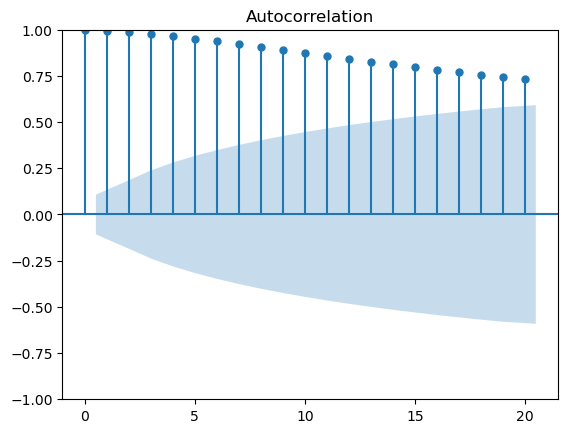

In [7]:
plot_acf(df["Value"], lags = 20)
plt.show()

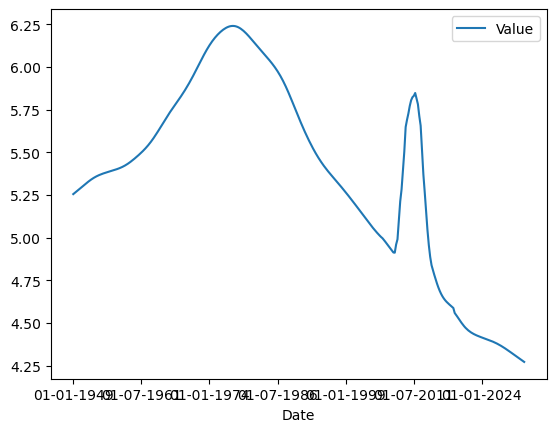

In [8]:
df.plot.line(x = "Date", y = "Value")
plt.show()

In [12]:
from statsmodels.tsa.ar_model import AutoReg

In [13]:
model = AutoReg(y_train, lags = 3 )
model_fit = model.fit()
print("coefficients %s"%model_fit.params)

coefficients const       0.010580
Value.L1    1.755377
Value.L2   -0.585087
Value.L3   -0.172295
dtype: float64


### Make Predictions

In [15]:
predictions = model_fit.predict(start = len(y_train),
                               end = len(y_train)+len(y_test)-1,
                               dynamic = False)

In [16]:
from sklearn.metrics import mean_squared_error

In [17]:
error  = mean_squared_error(y_test, predictions)
print("Test RMSE: %.3f" % sqrt(error))

Test RMSE: 0.035


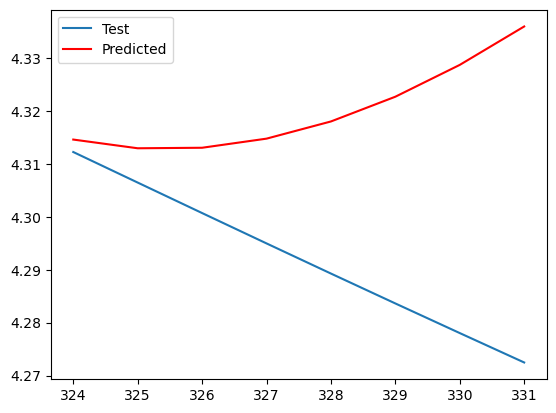

In [18]:
#plt.plot(y_train, label = "Train")
plt.plot(y_test, label = "Test")
plt.plot(predictions, color = "red", label = "Predicted")
plt.legend(loc = "best")
plt.show()